## 사이킷런의 정밀도와 재현율

- 의학(재현율) : Positive -> negative (큰일남)
- 스팸매일(정밀도)
- 재현율과 정밀도는 상보관계

In [1]:
import pandas as pd
import numpy as np

print('numpy version - ',np.__version__)
print('pandas version -',pd.__version__)
# ml
import sklearn
import missingno as msno

from sklearn.datasets import load_iris,load_breast_cancer

print('sklearn version - ',sklearn.__version__)


from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score,\
cross_validate,GridSearchCV,train_test_split 

from sklearn.tree            import DecisionTreeClassifier 
from sklearn.linear_model    import LogisticRegression #
from sklearn.ensemble        import RandomForestClassifier #
from sklearn.metrics         import accuracy_score, recall_score,\
precision_score, f1_score, confusion_matrix, make_scorer,\
precision_recall_curve
                            #(2진분류에만 사용)
from sklearn.impute          import SimpleImputer

import seaborn as sns
from io import StringIO
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder,\
StandardScaler,MinMaxScaler

numpy version -  1.20.3
pandas version - 1.3.4
sklearn version -  0.24.2


#### 분류모델의 성능평가
- 정확도 : 실 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표
- 문제점? - 이진분류의 경우 모델의 성능을 왜곡할 수 있다.
- why? : 데이터의 불균형
- 해결책 : F1 Score(Prescision, Recall)(이진분류의 데이터 불균형인 경우)

#### 분류모델 성능 평가를 위한 이해

In [2]:
print('TP(target = 1, predict = 1)')
print('TN(target = 0, predict = 0)')
print('FN(target = 1, predict = 0) -> type 2 error')
print('FP(target = 0, predict = 1) -> type 1 error')

target = [1,0,0,1,1,1,0,1,1,1]
prediction = [0,1,1,1,1,0,1,0,1,0]

tp = tn = fn = fp = 0

for idx in range(len(target)):
    #TP
    if target[idx] == 1 and prediction[idx] == 1 :
        tp += 1
    #TN
    if target[idx] == 0 and prediction[idx] == 0 :
        tn += 1
    #FN
    if target[idx] == 1 and prediction[idx] == 0 :
        fn += 1
    #FP
    if target[idx] == 0 and prediction[idx] == 1 :
        fp += 1
        
print()
print()
print('TP(target = 1, predict = 1) ', tp)
print('TN(target = 0, predict = 0) ', tn)
print('FN(target = 1, predict = 0) -> type 2 error ',fn)
print('FP(target = 0, predict = 1) -> type 1 error ',fp)

TP(target = 1, predict = 1)
TN(target = 0, predict = 0)
FN(target = 1, predict = 0) -> type 2 error
FP(target = 0, predict = 1) -> type 1 error


TP(target = 1, predict = 1)  3
TN(target = 0, predict = 0)  0
FN(target = 1, predict = 0) -> type 2 error  4
FP(target = 0, predict = 1) -> type 1 error  3


In [3]:
print('accurancy - ',accuracy_score(target,prediction))
# 2진 분류 불균형 데이터 모델인 경우
print('recall - ', recall_score(target,prediction))
print('precision - ', precision_score(target,prediction))
print('f1 score - ',f1_score(target,prediction)) # Harmonic mean
print()
print('confusion_matrix - \n ',confusion_matrix(target, prediction))


accurancy -  0.3
recall -  0.42857142857142855
precision -  0.5
f1 score -  0.4615384615384615

confusion_matrix - 
  [[0 3]
 [4 3]]


- 정밀도(Precision) : TP / (FP + TP)
- 상대적으로 정밀도가 더 중요한 지표인 경우의 모델? - 스팸메일
- 재현율(Recall) : TP / (FN + TP)
- 상대적으로 재현율 더 중요한 지표인 경우의 모델? - 의학(암진단), 금융(사기판별)

In [4]:
titanic = pd.read_csv('C:/Users/shhmu/data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
titanic['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [7]:
print('2. target, feature 로 데이터 분리')
titanic = pd.read_csv('C:/Users/shhmu/data/titanic_train.csv')
titanic_target = titanic['Survived']
titanic_feature = titanic.drop(['Survived'], axis =1)

print('target_type - ', type(titanic_target))
print('feature_type - ', type(titanic_feature))
titanic_feature.columns

2. target, feature 로 데이터 분리
target_type -  <class 'pandas.core.series.Series'>
feature_type -  <class 'pandas.core.frame.DataFrame'>


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic_target.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [9]:
print('3. 전처리 요구사항 - ')
print('불필요한 피처 제거 - PassengerId,Name,Ticket')
print('결측값 처리 - Age는 평균, Cabin는 N(label 인코딩(종류가 너무 많아)),\
Embarked는 N')
print('레이블 인코딩 - Sex, Cabin, Embarked')
titanic = pd.read_csv('C:/Users/shhmu/data/titanic_train.csv')
titanic_c = titanic.copy()
titanic_target = titanic_c['Survived']
titanic_feature = titanic_c.drop(['Survived'], axis =1)
titanic_feature

3. 전처리 요구사항 - 
불필요한 피처 제거 - PassengerId,Name,Ticket
결측값 처리 - Age는 평균, Cabin는 N(label 인코딩(종류가 너무 많아)),Embarked는 N
레이블 인코딩 - Sex, Cabin, Embarked


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
def drop_feature(frm):
    frm.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return frm

def pre_processing(frm):
    frm['Age'].fillna(frm['Age'].mean(), inplace = True)
    frm['Cabin'].fillna('N',inplace=True)
    frm['Embarked'].fillna('N',inplace=True)
    return frm

def label_encoder(frm):
    frm['Cabin'] = frm['Cabin'].str[:1] #슬라이싱 가능
    features = ['Sex','Cabin','Embarked']
    for feature in features:
        encoder = LabelEncoder()
        frm[feature] = encoder.fit_transform(frm[feature])
    
    return frm

In [11]:
titanic = pd.read_csv('C:/Users/shhmu/data/titanic_train.csv')
titanic_c = titanic.copy()
titanic_target = titanic_c['Survived']
titanic_feature = titanic_c.drop(['Survived'], axis =1)

feature_subset = drop_feature(titanic_feature)
feature_subset = pre_processing(feature_subset)
feature_subset = label_encoder(feature_subset)
feature_subset

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [12]:
print('학습과 테스트 분리 - ')
print()
x_train, x_test, y_train, y_test = train_test_split(feature_subset,
                                                   titanic_target,
                                                   test_size = 0.2,
                                                   random_state= 200)

학습과 테스트 분리 - 



In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

<AxesSubplot:>

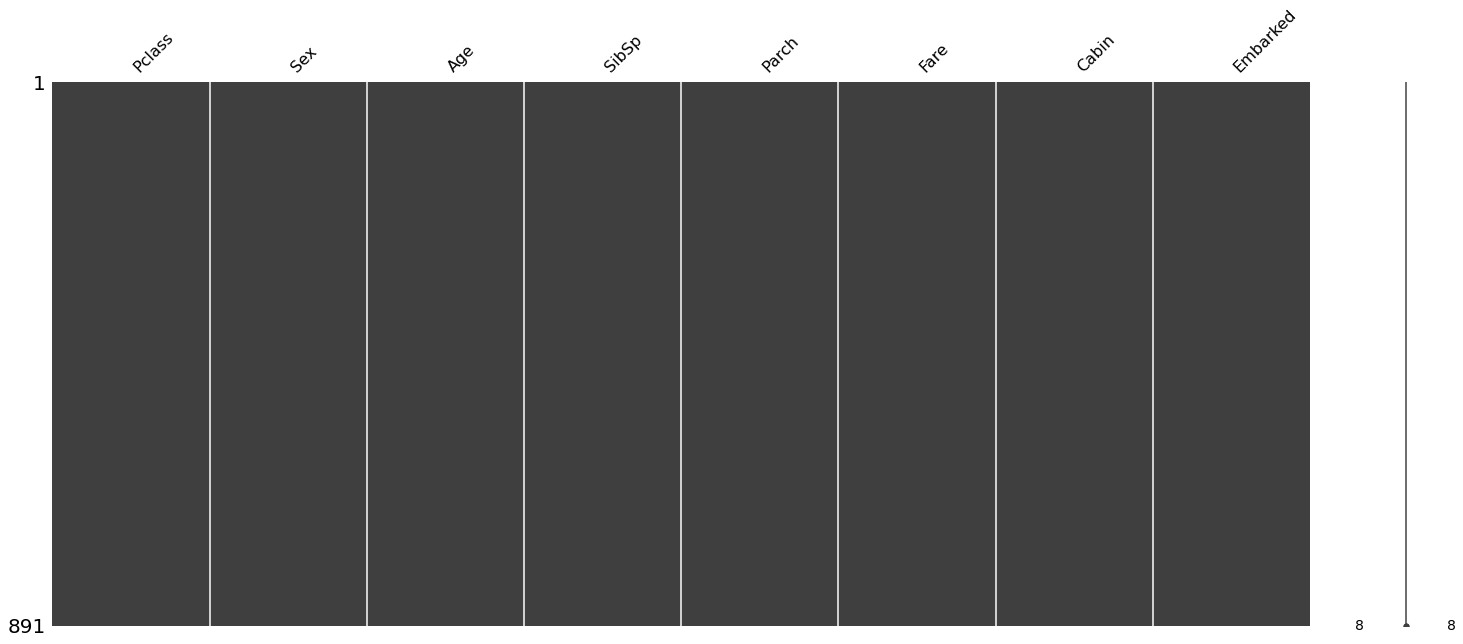

In [14]:
msno.matrix(feature_subset)

In [15]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_y_pred = lr_model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_y_pred = lr_model.predict(x_test)

In [17]:
def metrics_eval(target, prediction):
    print('accurancy - ',accuracy_score(target,prediction))
    print('recall - ', recall_score(target,prediction))
    print('precision - ', precision_score(target,prediction))
    print('f1 score - ',f1_score(target,prediction)) # Harmonic mean
    print()
    print('confusion_matrix - \n ',confusion_matrix(target, prediction))

In [18]:
print('LogisticRegression - ')
print()
metrics_eval(y_test, lr_y_pred) #metrics [[F,T],[F,T]]
print('accurancy - ',(85+53)/(85+19+22+53))

LogisticRegression - 

accurancy -  0.770949720670391
recall -  0.7066666666666667
precision -  0.7361111111111112
f1 score -  0.7210884353741497

confusion_matrix - 
  [[85 19]
 [22 53]]
accurancy -  0.770949720670391


In [19]:
print('DecisionTreeClassifier - ')
print()
metrics_eval(y_test, dt_y_pred)

DecisionTreeClassifier - 

accurancy -  0.770949720670391
recall -  0.7066666666666667
precision -  0.7361111111111112
f1 score -  0.7210884353741497

confusion_matrix - 
  [[85 19]
 [22 53]]


In [20]:
print('교차검증 - ')
fold = KFold(n_splits=20)
scoring ={
    'accuracy' : make_scorer(accuracy_score),
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1' : make_scorer(f1_score)
}

result = cross_validate(lr_model, x_train, y_train,
                       cv = fold,
                       scoring = scoring)
result.keys()

교차검증 - 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

In [21]:
result['test_accuracy'].mean()

0.7990476190476192

In [22]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
print('유방암 관련 데이터 - 정확도,재현율(실제 P를 N 예측하면 안되기 때문에)\
재현율을 볼것')
print('재현율은 실제 양성을 양성으로 예측한 비율이 높아야 성능이 좋은 모델')

유방암 관련 데이터 - 정확도,재현율(실제 P를 N 예측하면 안되기 때문에)재현율을 볼것
재현율은 실제 양성을 양성으로 예측한 비율이 높아야 성능이 좋은 모델


In [24]:
# 1. 데이터 프레임 만들기(피처, 타겟)포함
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [25]:
# 2. 타겟에 대한 균형 여부를 확인
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [26]:
cancer_df['target'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32>

In [29]:
cancer_target = cancer_df['target']
cancer_feature = cancer_df.drop(['target'], axis = 1)
cancer_feature # 변수에 저장하면 drop([타겟],inplace=True)없어도 타겟 없어짐

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [28]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.drop(['target'], axis = 1)
cancer_df # 그냥 drop만 사용하면 변경된 내용이 저장되지않아 위의 타겟이 그대로
############ 있음.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [30]:
x_train, x_test, y_train, y_test = train_test_split(cancer_feature,
                                                   cancer_target,
                                                   test_size = 0.2,
                                                   random_state= 200)

In [31]:
# 4. RandomForestClassifier 모델
cancer_rfc_model = RandomForestClassifier()
cancer_rfc_model.fit(x_train,y_train)
rfc_y_pred = cancer_rfc_model.predict(x_test)

In [32]:
# 5. 평가지표 확인
metrics_eval(y_test, rfc_y_pred)

accurancy -  0.9473684210526315
recall -  0.9736842105263158
precision -  0.9487179487179487
f1 score -  0.9610389610389611

confusion_matrix - 
  [[34  4]
 [ 2 74]]


In [33]:
print('교차검증 - ')
fold = KFold(n_splits=20)
scoring ={
    'accuracy' : make_scorer(accuracy_score),
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1' : make_scorer(f1_score)
}

result = cross_validate(cancer_rfc_model, x_train, y_train,
                       cv = fold,
                       scoring = scoring)
result.keys()

교차검증 - 


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

In [34]:
result['test_recall'].mean()

0.9667193223443222

In [35]:
result['test_accuracy'].mean()

0.9534584980237153

In [36]:
# 불필요한 피처 제거 - PassengerId,Name,Ticket
titanic = pd.read_csv('C:/Users/shhmu/data/titanic_train.csv')
titanic_target = titanic['Survived'].copy()
titanic_feature = titanic.drop(['Survived'], axis =1 ).copy()
titanic_feature.drop(['Name','Ticket','PassengerId'], axis = 1,inplace=True)

In [37]:
print('결측값 처리 - Age는 평균, Cabin는 N(label 인코딩(종류가 너무 많아)),\
Embarked는 N')
imputer = SimpleImputer(strategy='mean')
titanic_feature['Age'] = imputer.fit_transform(titanic_feature[['Age']])

titanic_feature['Cabin'] = titanic_feature['Cabin'].fillna('N')
titanic_feature['Embarked'] = titanic_feature['Embarked'].fillna('N')

결측값 처리 - Age는 평균, Cabin는 N(label 인코딩(종류가 너무 많아)),Embarked는 N


In [38]:
print('레이블 인코딩 - Sex, Cabin, Embarked')
encoder = LabelEncoder()
titanic_feature['Sex'] = encoder.fit(titanic_feature['Sex']).transform(titanic_feature['Sex'])
titanic_feature['Embarked'] = encoder.fit(titanic_feature['Embarked']).transform(titanic_feature['Embarked'])
for i,v in enumerate(titanic_feature['Cabin']):
    if 'A' in v:
        titanic_feature['Cabin'][i] = 'A'
    elif 'B' in v:
        titanic_feature['Cabin'][i] = 'B'
    elif 'C' in v:
        titanic_feature['Cabin'][i] = 'C'
    elif 'D' in v:
        titanic_feature['Cabin'][i] = 'D'
    elif 'E' in v:
        titanic_feature['Cabin'][i] = 'E'
    elif 'F' in v:
        titanic_feature['Cabin'][i] = 'F'
    elif 'G' in v:
        titanic_feature['Cabin'][i] = 'G'
titanic_feature['Cabin'] = encoder.fit(titanic_feature['Cabin']).transform(titanic_feature['Cabin'])

레이블 인코딩 - Sex, Cabin, Embarked


C:\Users\shhmu\AppData\Local\Temp/ipykernel_13092/4176060959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_feature['Cabin'][i] = 'C'
C:\Users\shhmu\AppData\Local\Temp/ipykernel_13092/4176060959.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_feature['Cabin'][i] = 'E'
C:\Users\shhmu\AppData\Local\Temp/ipykernel_13092/4176060959.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_feature['Cabin'][i] =

In [39]:
x1_train, x1_test, y1_train, y1_test = train_test_split(titanic_feature,
                                                   titanic_target,
                                                   test_size = 0.2,
                                                   random_state= 200)

In [40]:
dt1_model = DecisionTreeClassifier()
dt1_model.fit(x1_train,y1_train)
dt1_y_pred = lr_model.predict(x1_test)

In [41]:
metrics_eval(y1_test, dt1_y_pred)

accurancy -  0.770949720670391
recall -  0.7066666666666667
precision -  0.7361111111111112
f1 score -  0.7210884353741497

confusion_matrix - 
  [[85 19]
 [22 53]]


In [42]:
print('재현율을 높이기위한 방법으로 - GridSearchCV를 이용한 파라미터 튜닝!!')
print('n_estimators - tree 개수를 의미')
print('max_features - 최대 선택할 피처의 수를 의미')
print('max_depth - 최대 선택할 트리의 깊이를 의미')

재현율을 높이기위한 방법으로 - GridSearchCV를 이용한 파라미터 튜닝!!
n_estimators - tree 개수를 의미
max_features - 최대 선택할 피처의 수를 의미
max_depth - 최대 선택할 트리의 깊이를 의미


In [43]:
param = {
    'n_estimators' : [50, 100, 150, 200],
    'max_features' : [6, 8, 15, 20],
    'max_depth'    : [4, 6, 8] #뎁스가 깊다고 성능이 좋은 것은 아니다.
}
cancer_rfc_model = RandomForestClassifier()
grid_search_model =GridSearchCV(cancer_rfc_model,
                               param_grid = param,
                               cv = 20,
                               refit = True,
                               scoring = 'recall')
grid_search_model.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [6, 8, 15, 20],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall')

In [44]:
grid_search_model.cv_results_

{'mean_fit_time': array([0.11435127, 0.19296108, 0.2958046 , 0.37699218, 0.10919999,
        0.20821631, 0.35138043, 0.4165308 , 0.13318487, 0.26677341,
        0.37466059, 0.54073932, 0.13973107, 0.29734337, 0.4447969 ,
        0.62245162, 0.10250232, 0.22636254, 0.30427059, 0.38232689,
        0.10028259, 0.21713344, 0.29775587, 0.43005087, 0.13115267,
        0.25698063, 0.41965671, 0.56164912, 0.16801935, 0.33702139,
        0.46643128, 0.63868554, 0.09773208, 0.19819417, 0.26655184,
        0.41008685, 0.11435164, 0.2076036 , 0.31381714, 0.41332023,
        0.14331443, 0.25510495, 0.39696167, 0.52067407, 0.15986773,
        0.30649664, 0.48416511, 0.60320566]),
 'std_fit_time': array([0.04697096, 0.02293547, 0.02470187, 0.04060633, 0.02409843,
        0.03878102, 0.06333633, 0.03085557, 0.01411586, 0.0319111 ,
        0.04254489, 0.03273574, 0.0162079 , 0.05705993, 0.05220062,
        0.04727954, 0.01506028, 0.05683911, 0.03094067, 0.03722611,
        0.00963647, 0.03222445, 0.017

In [45]:
grid_search_model.best_params_

{'max_depth': 4, 'max_features': 8, 'n_estimators': 100}

In [46]:
grid_search_model.best_score_

0.9785714285714284

In [47]:
rf_estimator = grid_search_model.best_estimator_

In [48]:
best_y_pred = rf_estimator.predict(x_test)
metrics_eval(y_test, best_y_pred)

accurancy -  0.9473684210526315
recall -  0.9736842105263158
precision -  0.9487179487179487
f1 score -  0.9610389610389611

confusion_matrix - 
  [[34  4]
 [ 2 74]]


#### 정밀도와 재현율을 임의로 조절하는 모델을 생성해야하는 경우
- 분류 임계값이 낮을수록 Positive를 예측할 학률이 높아져 재현율이 증가
- predict_proba()

In [49]:
matrix = [
    [-1,-1,2],
    [2,0,0],
    [0,1.1,1.2]
]

In [50]:
from sklearn.preprocessing import Binarizer

holder = Binarizer(threshold = 1.1) # 같은 값까지 0
print(holder.fit_transform(matrix) )

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [54]:
titanic_frm = pd.read_csv('C:/Users/shhmu/data/titanic_train.csv')
titanic_frm.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
titanic_target = titanic_frm['Survived']
titanic_feature = titanic_frm.drop(['Survived'], axis =1)

In [56]:
def drop_feature(frm):
    frm.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return frm

def pre_processing(frm):
    frm['Age'].fillna(frm['Age'].mean(), inplace = True)
    frm['Cabin'].fillna('N',inplace=True)
    frm['Embarked'].fillna('N',inplace=True)
    return frm

def label_encoder(frm):
    frm['Cabin'] = frm['Cabin'].str[:1]
    features = ['Sex','Cabin','Embarked']
    for feature in features:
        encoder = LabelEncoder()
        frm[feature] = encoder.fit_transform(frm[feature])
    
    return frm

In [60]:
feature_subset = drop_feature(titanic_feature)
feature_subset = pre_processing(feature_subset)
feature_subset = label_encoder(feature_subset)
feature_subset

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [61]:
x_train, x_test, y_train, y_test = train_test_split(feature_subset,
                                                   titanic_target,
                                                   test_size = 0.2,
                                                   random_state= 100)

In [62]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [63]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test) # 예측정답나옴

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
print('확률예측 값 - predict_proba()')
predict_proba_result = logistic_model.predict_proba(x_test) # 예측확률 나옴
print('type - ',type(predict_proba_result))
print('shape - ',predict_proba_result.shape)
print('type - ', type(y_pred))
print('shape - ',y_pred.shape)

확률예측 값 - predict_proba()
type -  <class 'numpy.ndarray'>
shape -  (179, 2)
type -  <class 'numpy.ndarray'>
shape -  (179,)


In [65]:
predict_proba_result[0:3]

array([[0.16620951, 0.83379049],
       [0.26645451, 0.73354549],
       [0.8965249 , 0.1034751 ]])

In [66]:
y_pred[:3]

array([1, 1, 0], dtype=int64)

In [67]:
import numpy as np
pred_prob_concat = np.concatenate([predict_proba_result,y_pred.reshape(-1,1)],axis =1)
pred_prob_concat[0:10]

array([[0.16620951, 0.83379049, 1.        ],
       [0.26645451, 0.73354549, 1.        ],
       [0.8965249 , 0.1034751 , 0.        ],
       [0.40388898, 0.59611102, 1.        ],
       [0.86336574, 0.13663426, 0.        ],
       [0.25824152, 0.74175848, 1.        ],
       [0.8998477 , 0.1001523 , 0.        ],
       [0.78226965, 0.21773035, 0.        ],
       [0.05887811, 0.94112189, 1.        ],
       [0.63210508, 0.36789492, 0.        ]])

In [68]:
user_th = 0.3
predict_proba_positive = predict_proba_result[:,1].reshape(-1,1)
user_pred = Binarizer(threshold = user_th)\
.fit_transform(predict_proba_positive)

In [69]:
print('default - ')
metrics_eval(y_test, y_pred)
print()
print('user th - 0.3')
metrics_eval(y_test,user_pred)

default - 
accurancy -  0.8044692737430168
recall -  0.72
precision -  0.7941176470588235
f1 score -  0.7552447552447551

confusion_matrix - 
  [[90 14]
 [21 54]]

user th - 0.3
accurancy -  0.7932960893854749
recall -  0.7733333333333333
precision -  0.7435897435897436
f1 score -  0.7581699346405228

confusion_matrix - 
  [[84 20]
 [17 58]]


#### trade-off 시각화
- precision_recall_curve(실제값,예측 확률 값): 임계값 변화에 따른 평가지표를 반환
- 반환값: 정밀도,재현율,임계 값

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
# predict_proba_result = logistic_model.predict_proba(x_test)
predict_proba_positive = predict_proba_result[:,1]
precision, recall, th = precision_recall_curve(y_test, predict_proba_positive)
print('Precision type - ',type(precision))
print('recall type - ',type(recall))
print('th type - ',type(th))
print('precision shape - ', precision.shape)
print('recall shape - ', recall.shape)
print('th shape -',th.shape)

Precision type -  <class 'numpy.ndarray'>
recall type -  <class 'numpy.ndarray'>
th type -  <class 'numpy.ndarray'>
precision shape -  (149,)
recall shape -  (149,)
th shape - (148,)


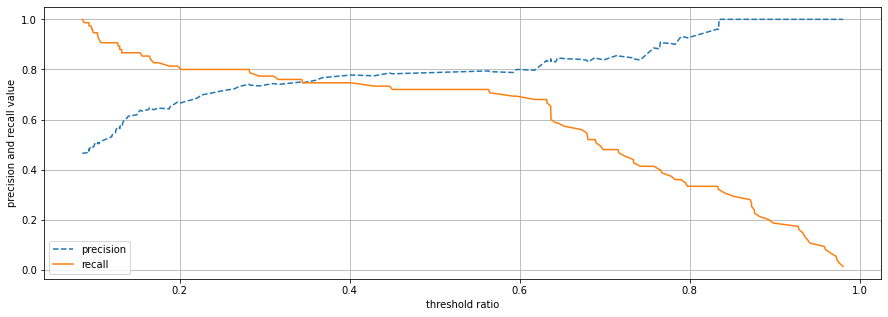

In [75]:
plt.figure(figsize=(15,5))


plt.plot(th, precision[ 0 : th.shape[0]] , linestyle="--", label="precision")
plt.plot(th, recall[ 0 : th.shape[0]]    , linestyle="-" , label="recall")

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')

plt.grid()
plt.legend()
plt.show()
plt.close()